# Data examination

The data is found in the following files:

- Computation results: `read.csv("..\\data\\results.csv", header = TRUE, sep = ",")`
- Fit data: `read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")`
- Correlation lenghths: `read.csv("..\\data\\results_corr.csv", header = TRUE, sep = ",")`
- Correlation functions: `read.csv(paste("..\\data\\plot_data\\correlation_", index, ".csv", sep = ""), header = FALSE)`

In a first step we present a concise overview table over the correlation lenght data.

In [1]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")
corr <- read.csv("..\\data\\results_corr.csv", header = TRUE, sep = ",")

# Removing unnecessary data
d <- corr[, !(names(corr) %in% c("m12", "m23", "m13", "m34", "m24", "m14"))]

# Rounding correlation lenghts
d$corr12 <- round(d$corr12, digits = 2)
d$corr23 <- round(d$corr23, digits = 2)
d$corr34 <- round(d$corr34, digits = 2)
d$corr13 <- round(d$corr13, digits = 2)
d$corr24 <- round(d$corr24, digits = 2)
d$corr14 <- round(d$corr14, digits = 2)
d$corr_fit <- round(fit$corr, digits = 2)

# Eventually removing correlation lenghts with momentum mode 4
d <- d[, !(names(d) %in% c("corr34", "corr24", "corr14"))]

# Adding additional info
temps <- c()
max_ts <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts

# Reordering columns
overview <- d[, c(1, 7, 6, 2, 3, 4, 5)]

# Looking at the interesting data
overview[overview$temp >= 0.1 & overview$temp < 0.7, ]

Warning message in file(file, "rt"):
"kann Datei '..\data\results.csv' nicht öffnen: No such file or directory"


ERROR: Error in file(file, "rt"): kann Verbindung nicht öffnen


## Correlation lenghts

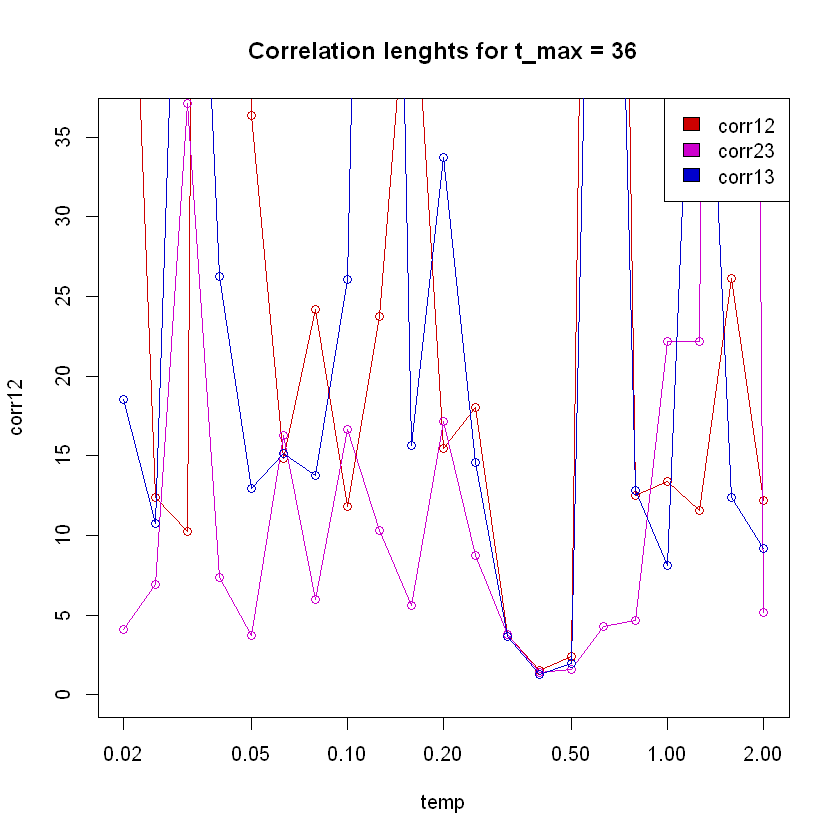

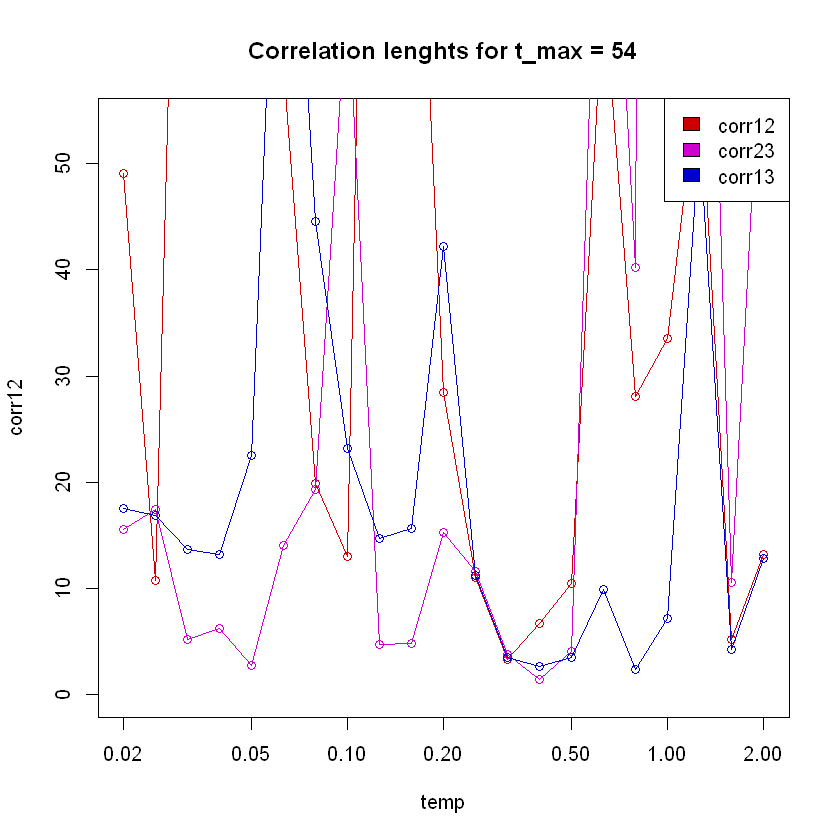

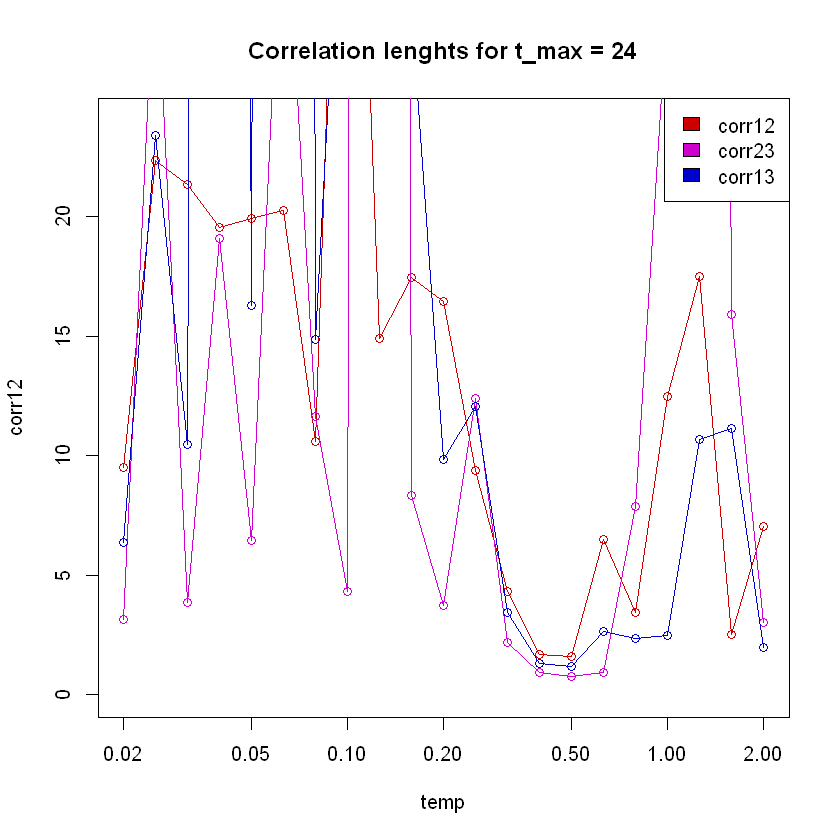

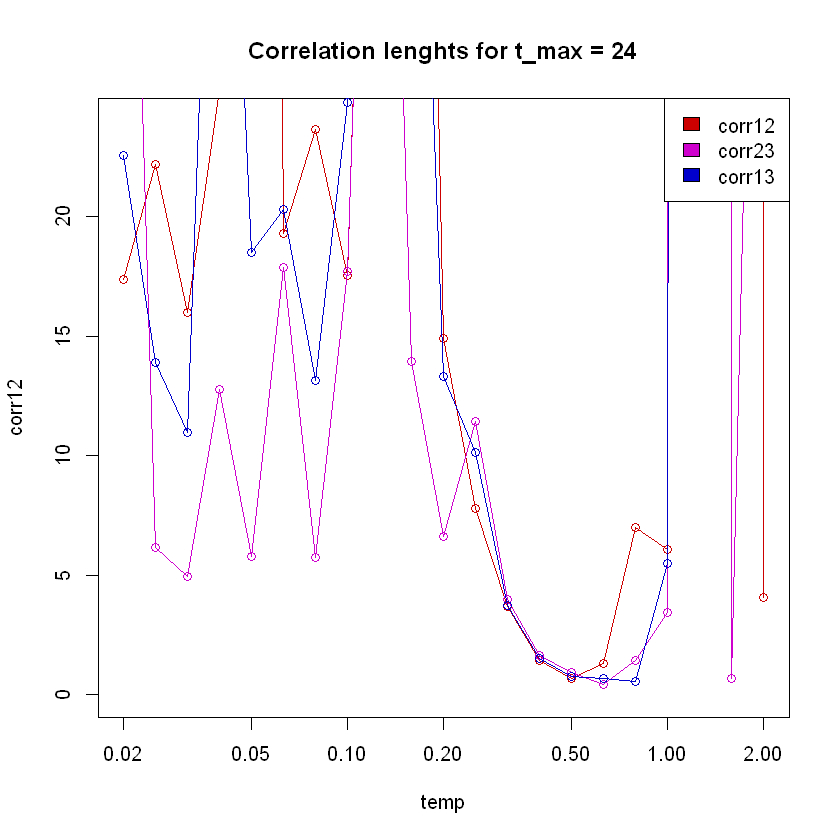

In [69]:
simulations <- list(
	size = c(36, 54, 24, 24),
	lowest_index = c(0, 21, 42, 63),
	hightest_index = c(20, 41, 62, 83)
)

for (sim_index in 1:4) {
	size <- simulations$size[sim_index]
	lowest_index <- simulations$lowest_index[sim_index]
	hightest_index <- simulations$hightest_index[sim_index]

	d <- overview[overview$index >= lowest_index & overview$index <= hightest_index, ]

	plot(corr12 ~ temp, data = d, log = "x", ylim = c(0, size), col = "red3", type = "o")
	title(paste("Correlation lenghts for t_max =", size))
	legend <- list(names = c("corr12"), cols = "red3")

	add_plot_line <- function(formula, name, col) {
		points(formula, data = d, col = col)
		lines(formula, data = d, col = col)
		legend$names <- append(legend$names, c(name))
		legend$cols <- append(legend$cols, c(col))
		legend
	}

	legend <- add_plot_line(corr23 ~ temp, "corr23", "magenta3")
	#legend <- add_plot_line(corr34 ~ temp, "corr34", "purple3")
	legend <- add_plot_line(corr13 ~ temp, "corr13", "blue3")
	#legend <- add_plot_line(corr24 ~ temp, "corr24", "skyblue3")
	#legend <- add_plot_line(corr14 ~ temp, "corr14", "green3")

	legend("topright", y = legend$names, fill = legend$cols)
}

## Correlation function

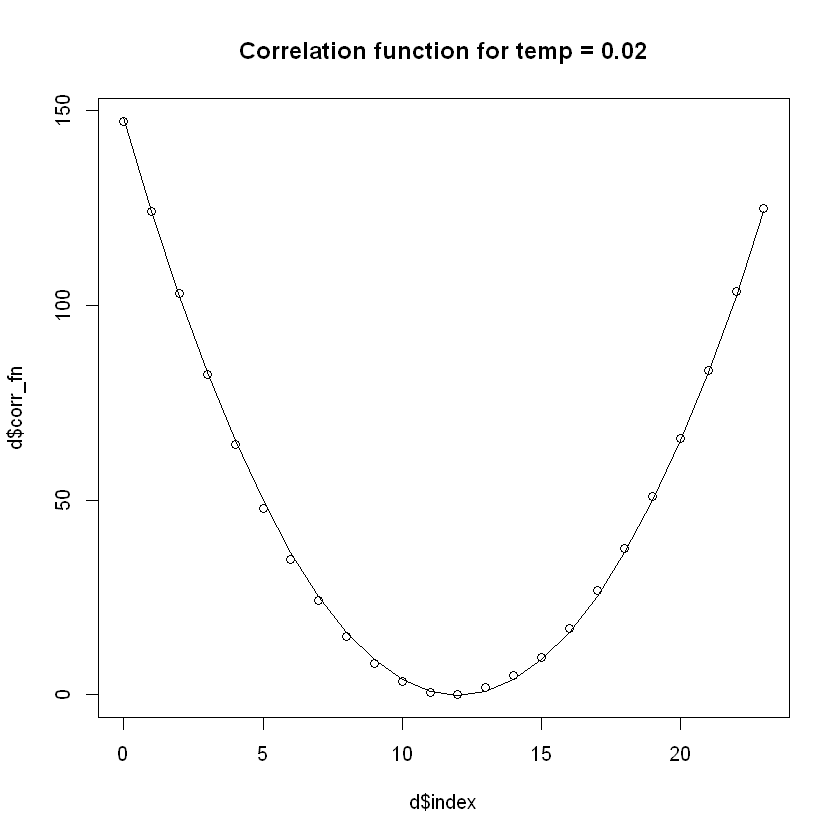

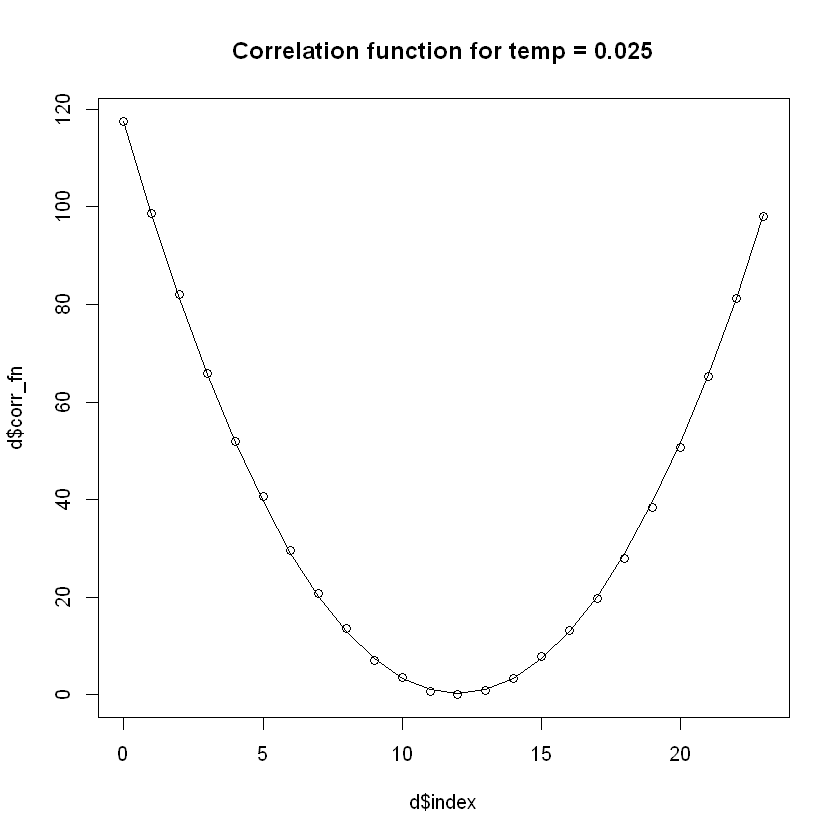

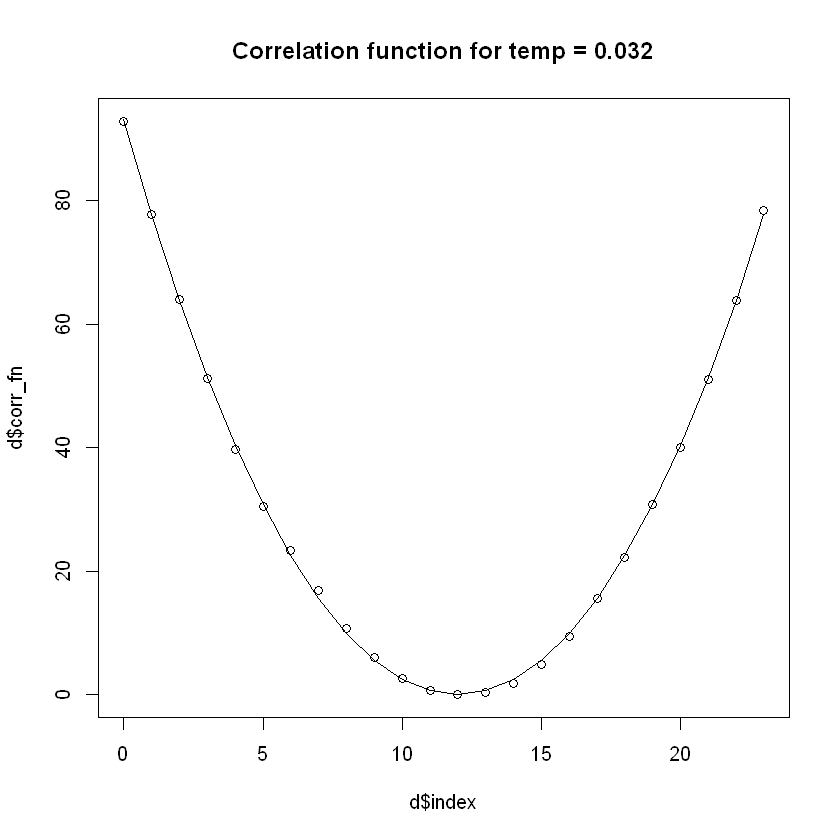

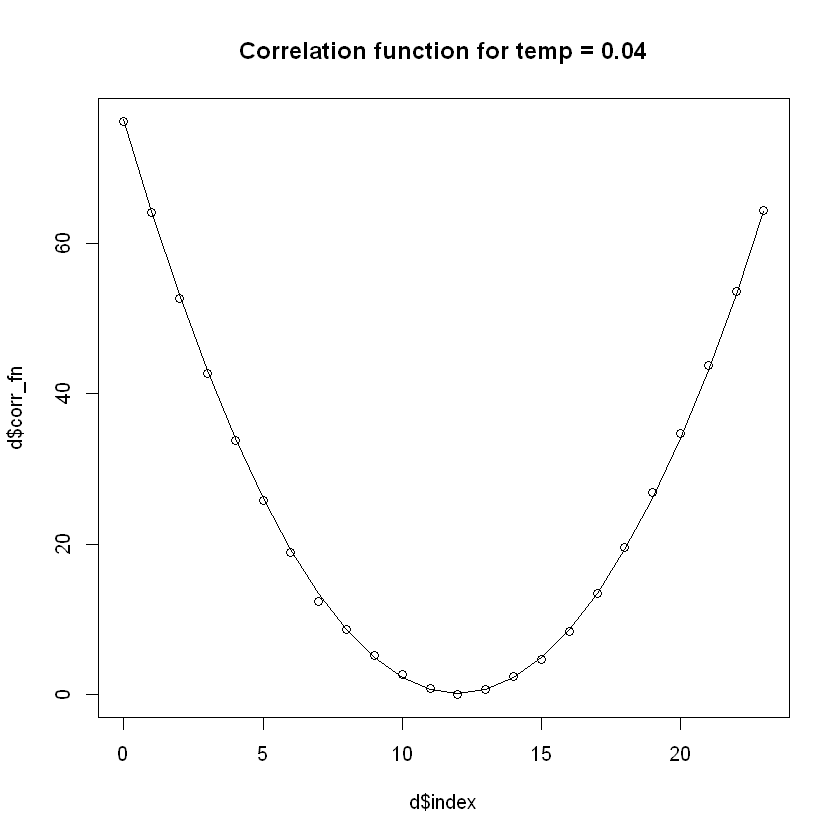

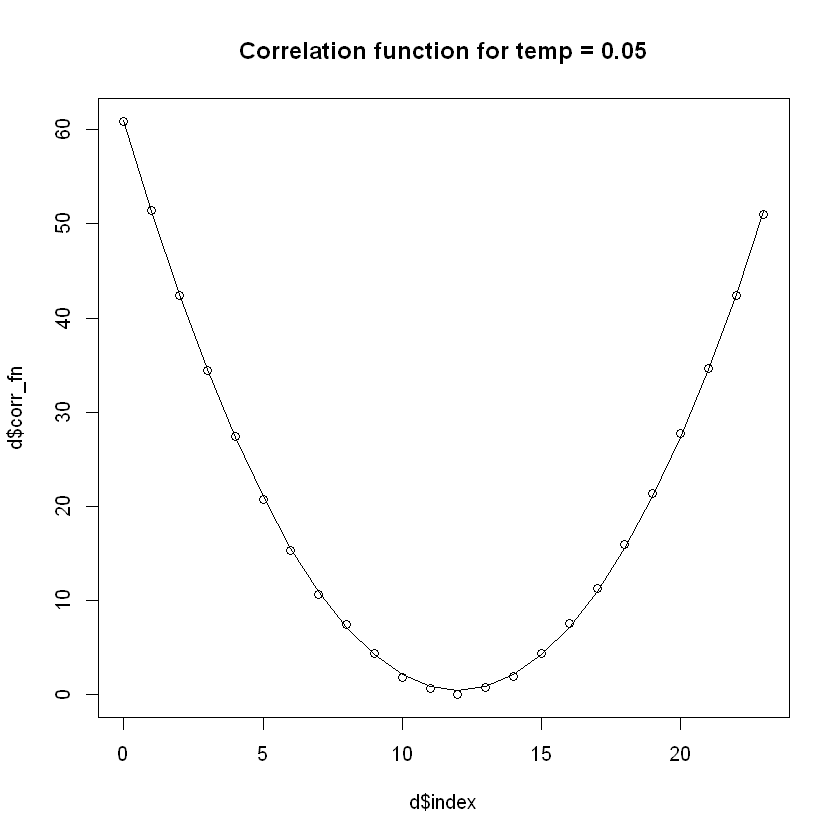

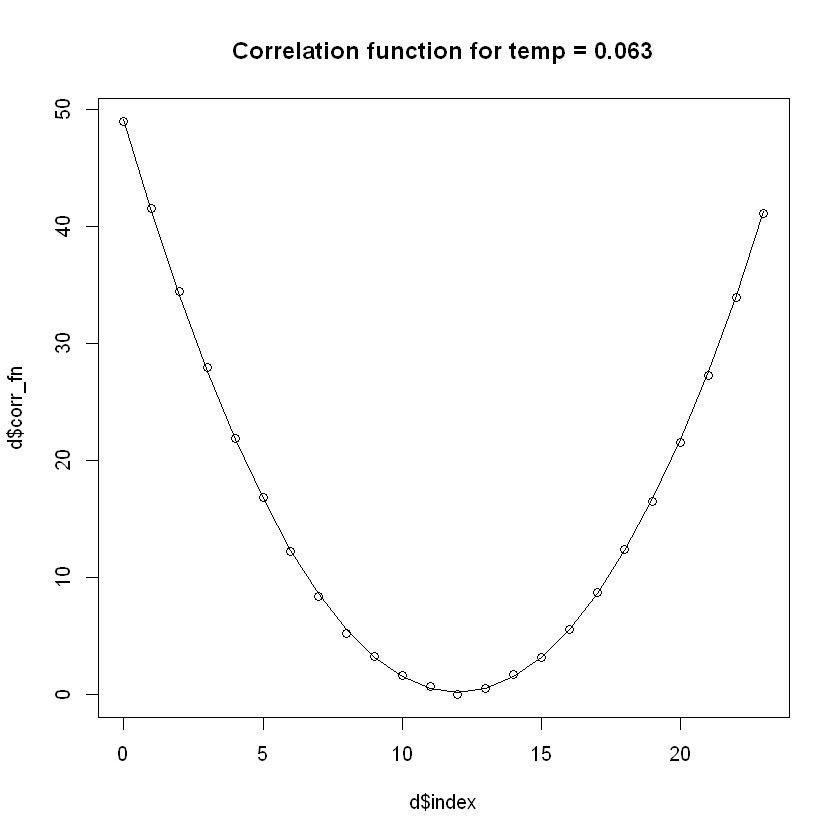

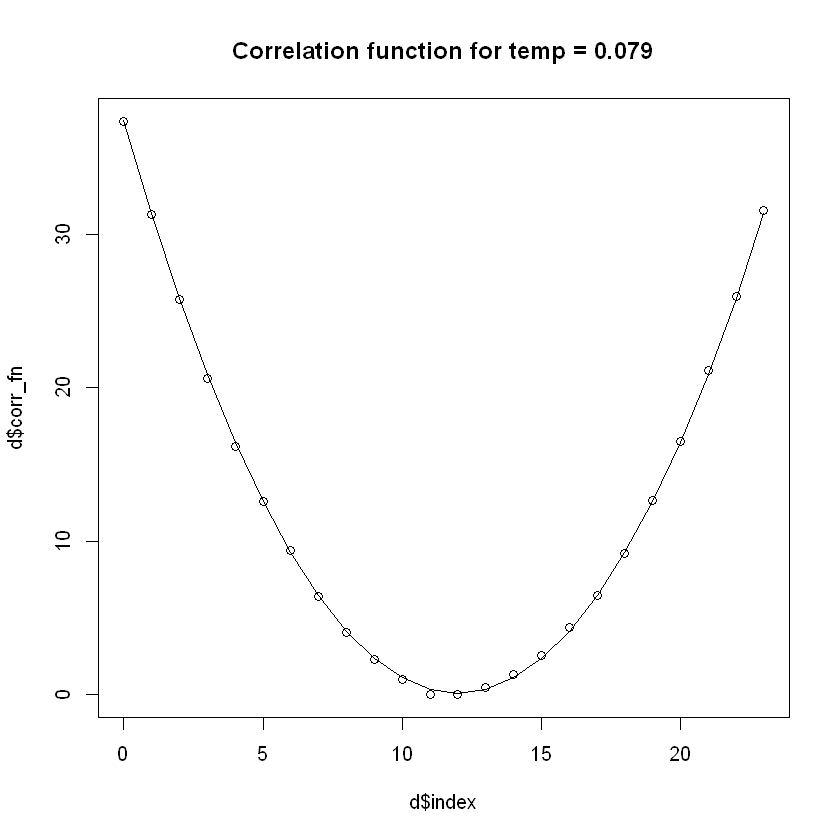

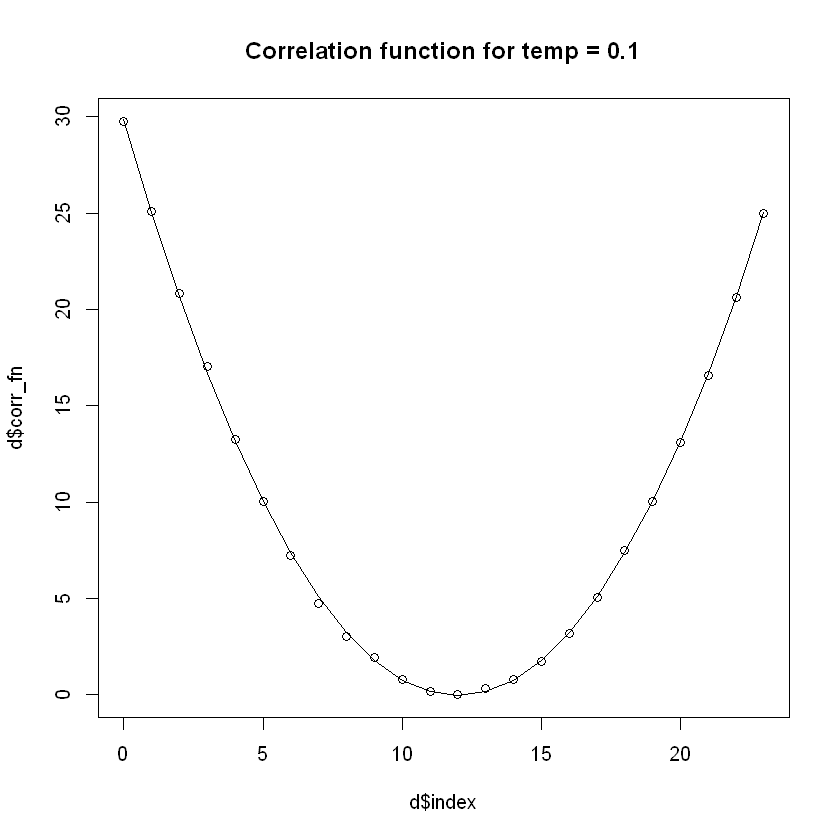

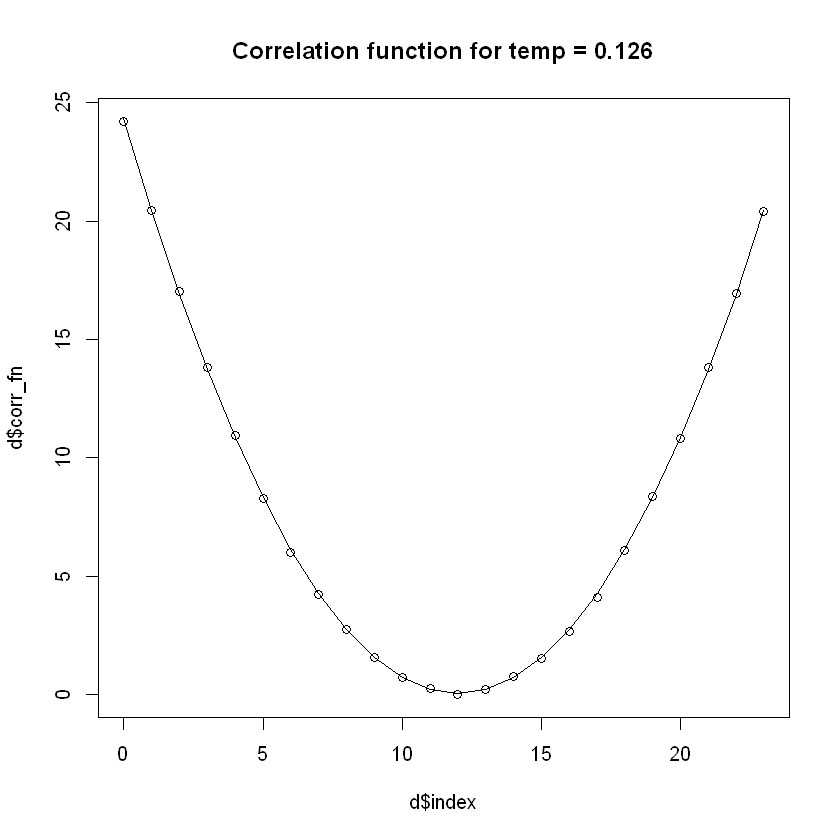

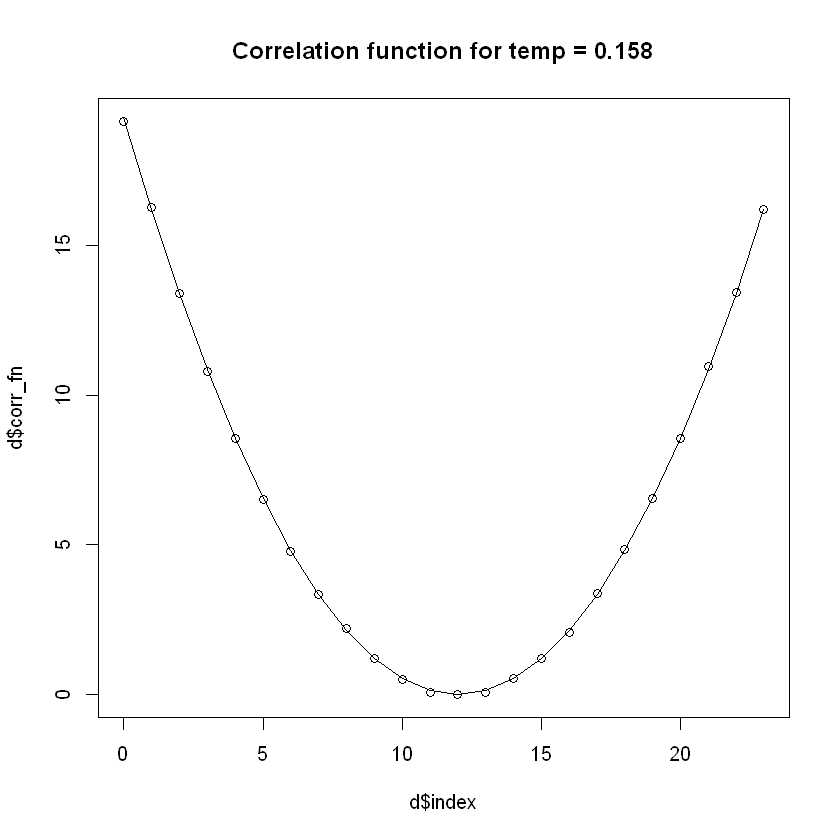

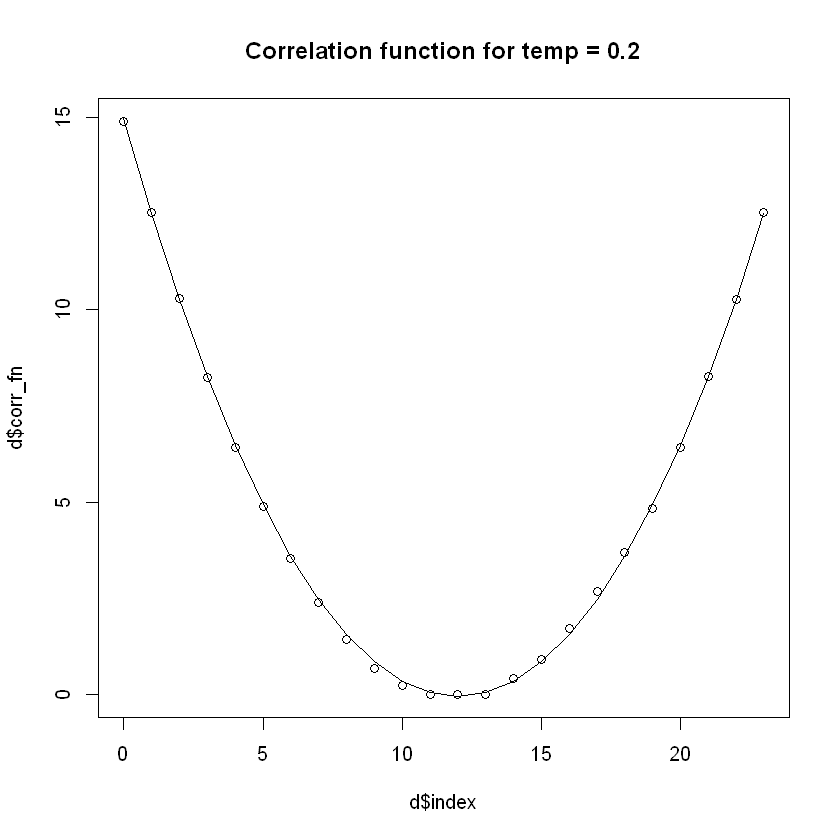

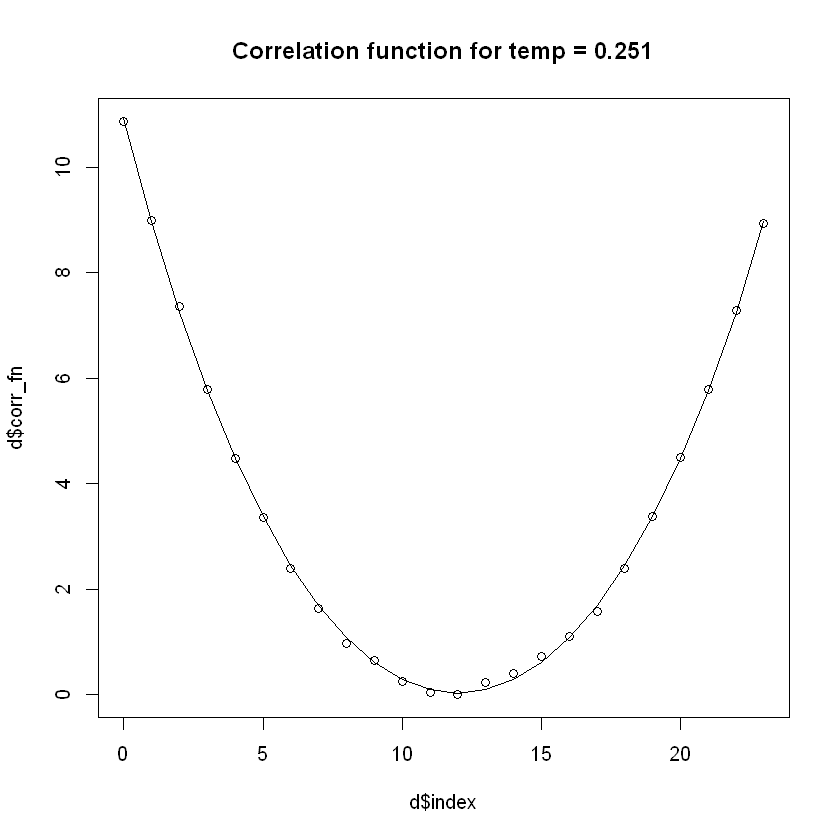

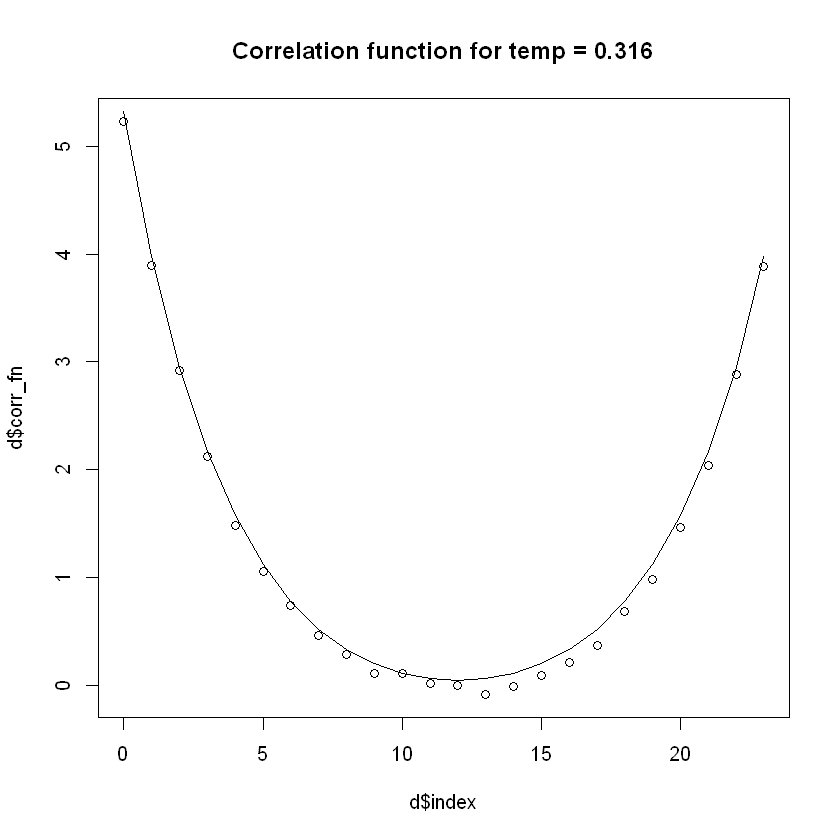

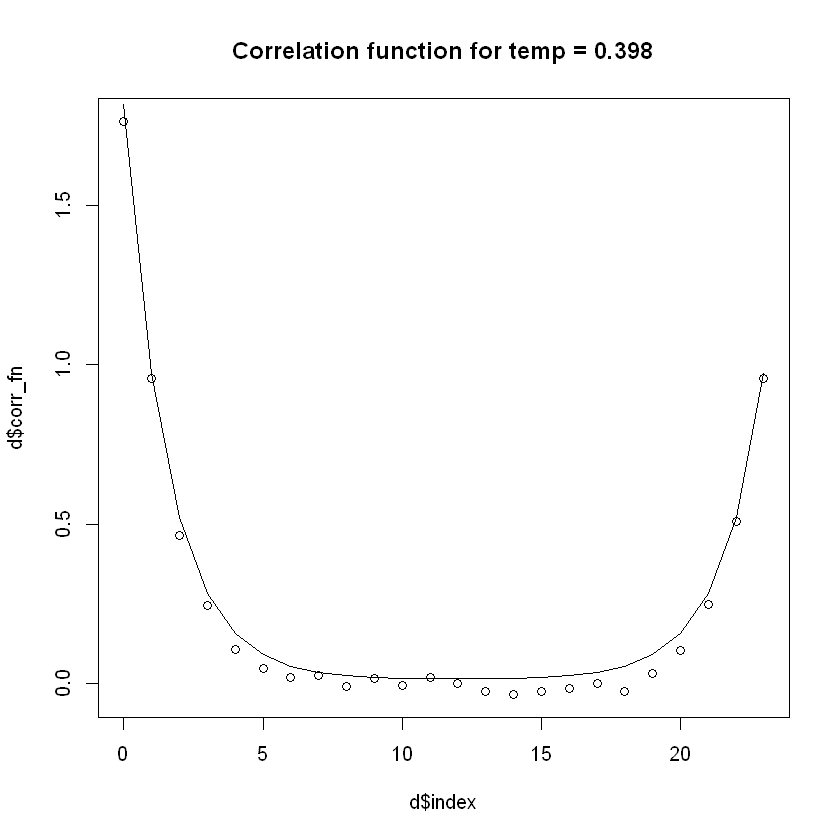

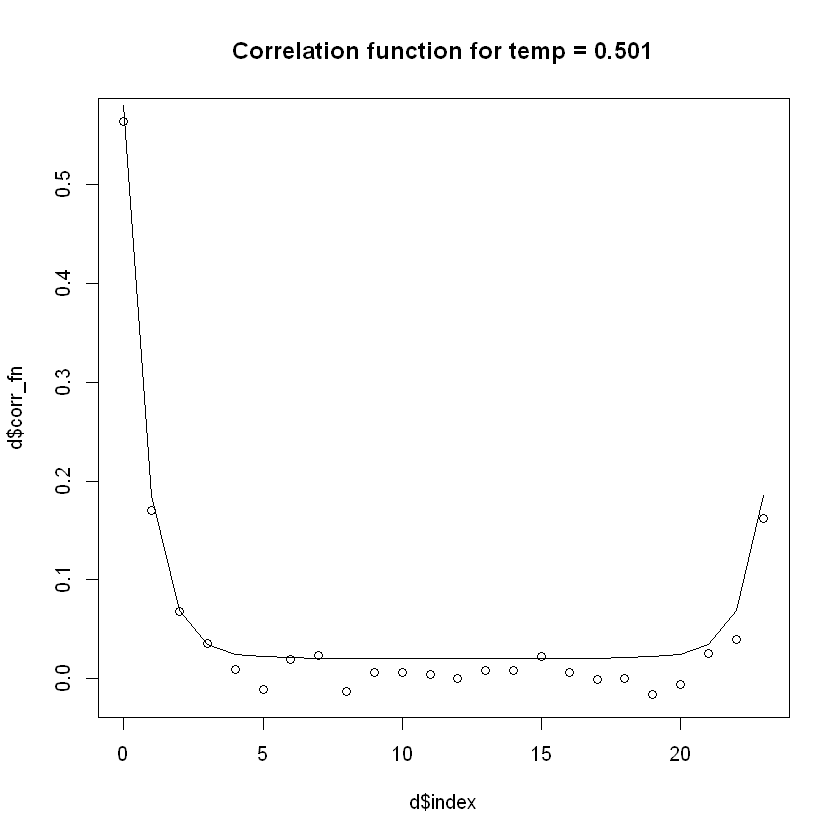

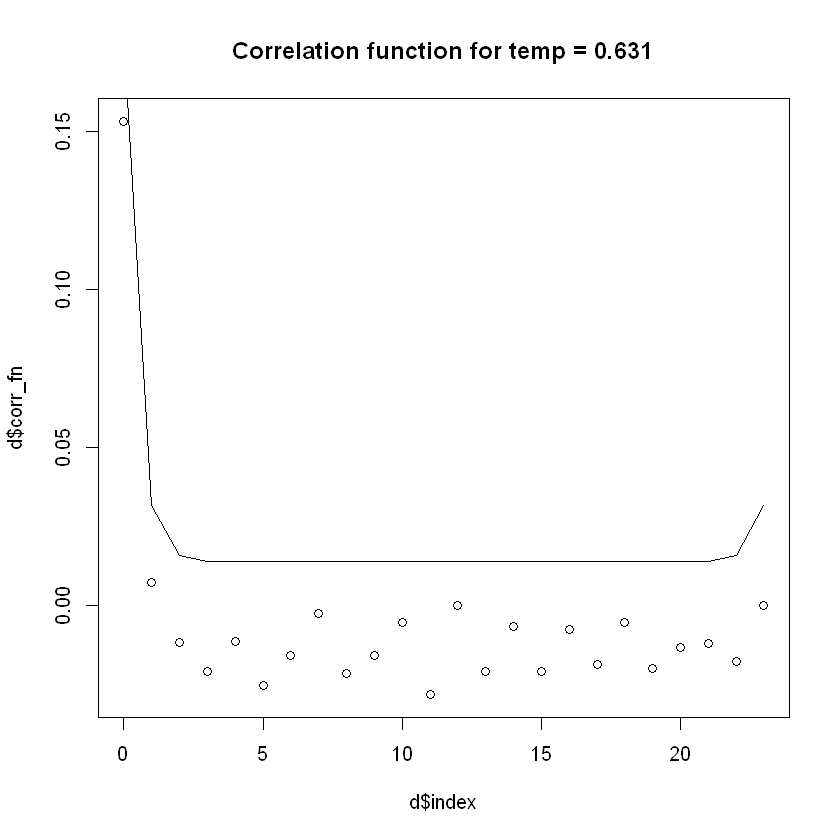

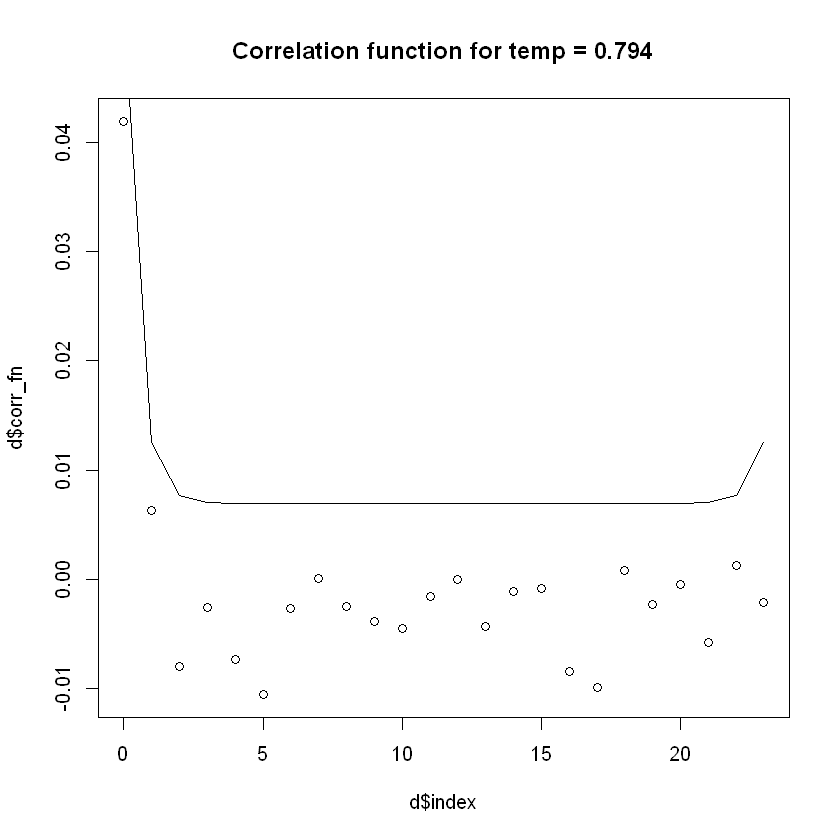

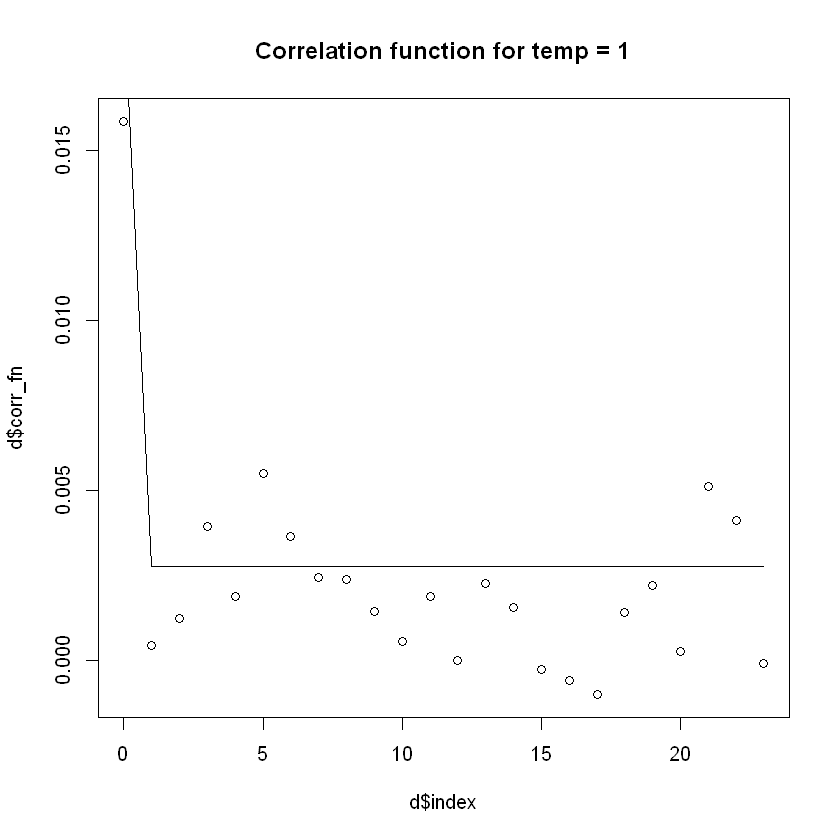

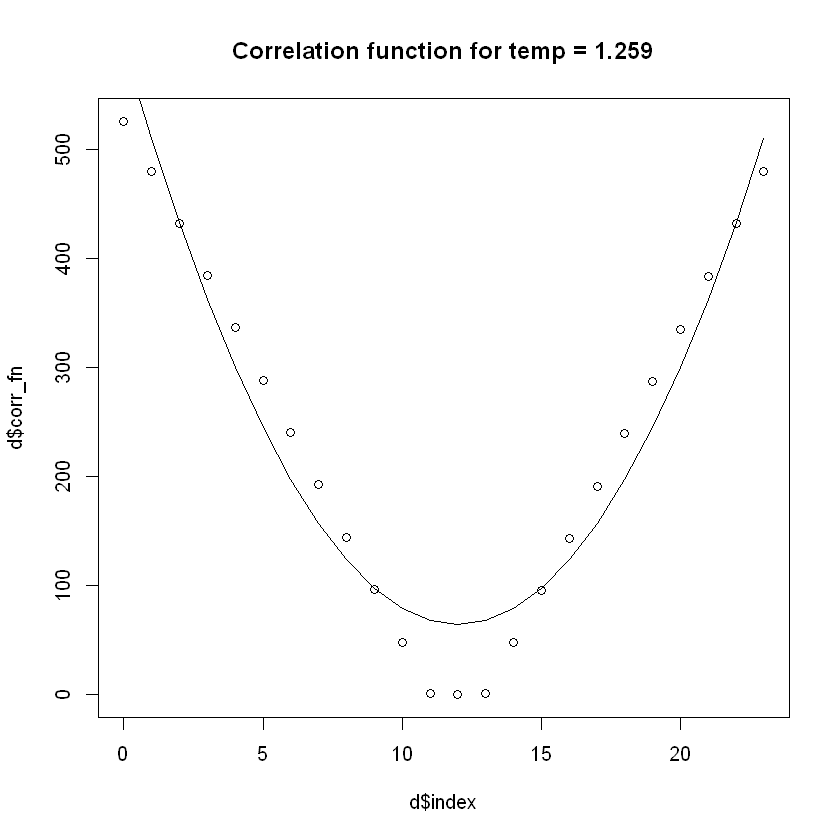

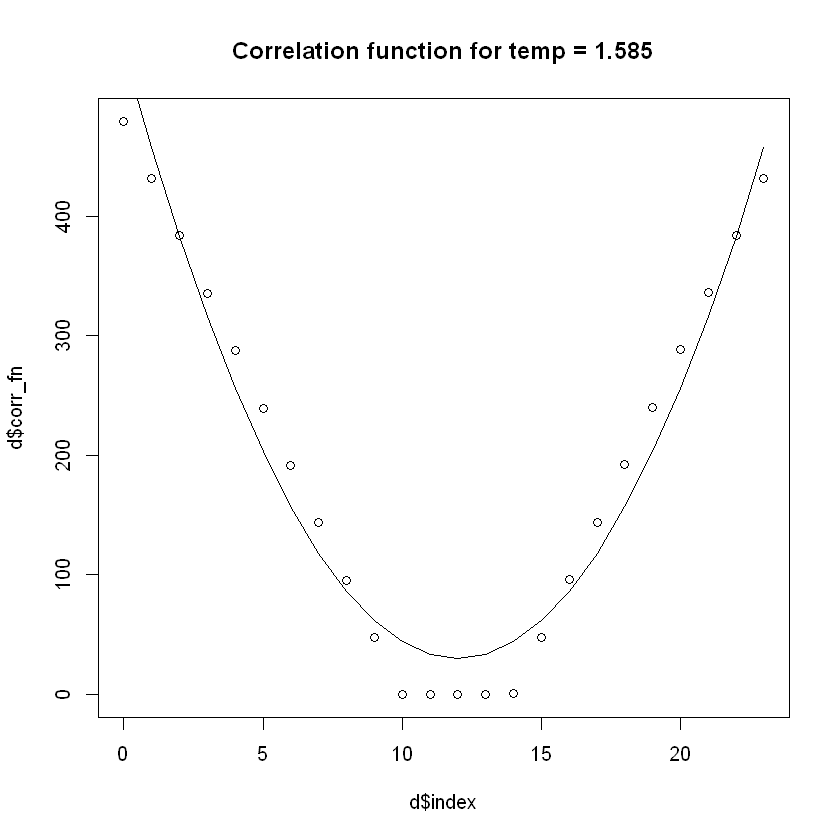

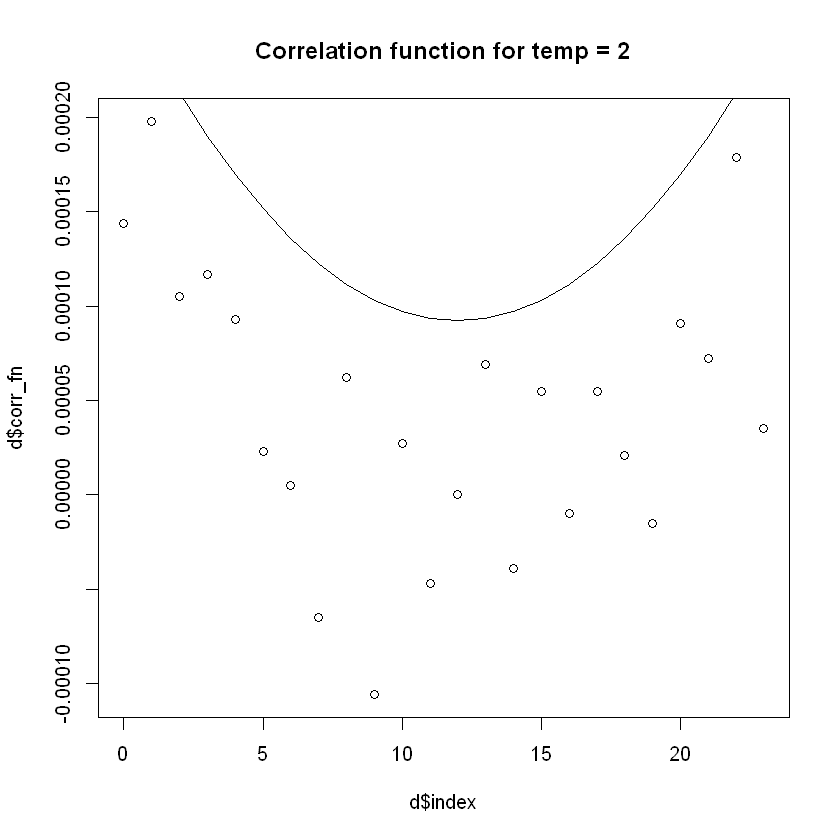

In [59]:
results <- read.csv("..\\..\\data\\results.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\..\\data\\results_fit.csv", header = TRUE, sep = ",")
corr <- read.csv("..\\..\\data\\results_corr.csv", header = TRUE, sep = ",")

for (index in 63:83) {
	d <- read.csv(paste("..\\..\\data\\plot_data\\correlation_", index, ".csv", sep = ""), header = FALSE)
	colnames(d) <- c("corr_fn")
	d$index <- 1:nrow(d) - 1
	d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

	#d$sym_corr_fn <- d$corr_fn
	#for (i in 1:(nrow(d) - 1)) {
	#	d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
	#}

	params <- fit[fit$index == index, ]
	d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b
	plot(d$index, d$corr_fn)
	title(paste("Correlation function for temp =", round(overview$temp[overview$index == index], digits = 3)))
	lines(d$index, d$fit)
}